---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# The Series Data Structure

In [24]:
import pandas as pd
pd.Series?

In [25]:
animals = ['Tiger', 'Bear', 'Moose']
pd.Series(animals)

0    Tiger
1     Bear
2    Moose
dtype: object

In [26]:
numbers = [1, 2, 3]
pd.Series(numbers)

0    1
1    2
2    3
dtype: int64

In [30]:
animals = ['Tiger', 'Bear', None]
pd.Series(animals)

0    Tiger
1     Bear
2     None
dtype: object

In [31]:
numbers = [1, 2, None]
pd.Series(numbers)

0    1.0
1    2.0
2    NaN
dtype: float64

In [32]:
import numpy as np
np.nan == None

False

In [33]:
np.nan == np.nan

False

In [34]:
np.isnan(np.nan)

True

In [35]:
sports = {'Archery': 'Bhutan',
          'Golf': 'Scotland',
          'Sumo': 'Japan',
          'Taekwondo': 'South Korea'}
s = pd.Series(sports)
s

Archery           Bhutan
Golf            Scotland
Sumo               Japan
Taekwondo    South Korea
dtype: object

In [36]:
s.index

Index(['Archery', 'Golf', 'Sumo', 'Taekwondo'], dtype='object')

In [37]:
s = pd.Series(['Tiger', 'Bear', 'Moose'], index=['India', 'America', 'Canada'])
s

India      Tiger
America     Bear
Canada     Moose
dtype: object

In [38]:
sports = {'Archery': 'Bhutan',
          'Golf': 'Scotland',
          'Sumo': 'Japan',
          'Taekwondo': 'South Korea'}
s = pd.Series(sports, index=['Golf', 'Sumo', 'Hockey'])
s

Golf      Scotland
Sumo         Japan
Hockey         NaN
dtype: object

# Querying a Series

In [39]:
sports = {'Archery': 'Bhutan',
          'Golf': 'Scotland',
          'Sumo': 'Japan',
          'Taekwondo': 'South Korea'}
s = pd.Series(sports)
s

Archery           Bhutan
Golf            Scotland
Sumo               Japan
Taekwondo    South Korea
dtype: object

In [40]:
s.iloc[3] #use index it self 

'South Korea'

In [41]:
s.loc['Golf'] #use value in index 

'Scotland'

In [42]:
s[3]

'South Korea'

In [43]:
s['Golf']

'Scotland'

In [44]:
sports = {99: 'Bhutan',
          100: 'Scotland',
          101: 'Japan',
          102: 'South Korea'}
s = pd.Series(sports)

In [45]:
s[0] #This won't call s.iloc[0] as one might expect, it generates an error instead

KeyError: 0

In [46]:
s = pd.Series([100.00, 120.00, 101.00, 3.00])
s

0    100.0
1    120.0
2    101.0
3      3.0
dtype: float64

In [47]:
total = 0
for item in s:
    total+=item
print(total)

324.0


In [48]:
import numpy as np

total = np.sum(s)
print(total)

324.0


In [49]:
#this creates a big series of random numbers
s = pd.Series(np.random.randint(0,1000,10000))
s.head()

0    597
1    436
2    722
3    869
4    676
dtype: int32

In [50]:
len(s)

10000

In [51]:
%%timeit -n 100
summary = 0
for item in s:
    summary+=item

1.45 ms ± 19 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [52]:
%%timeit -n 100
summary = np.sum(s)

86 µs ± 6.41 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [53]:
s+=2 #adds two to each item in s using broadcasting
s.head()

0    599
1    438
2    724
3    871
4    678
dtype: int32

In [56]:
s = pd.Series([1, 2, 3])
s.loc['Animal'] = 'Bears'
s

0             1
1             2
2             3
Animal    Bears
dtype: object

In [57]:
original_sports = pd.Series({'Archery': 'Bhutan',
                             'Golf': 'Scotland',
                             'Sumo': 'Japan',
                             'Taekwondo': 'South Korea'})
cricket_loving_countries = pd.Series(['Australia',
                                      'Barbados',
                                      'Pakistan',
                                      'England'], 
                                   index=['Cricket',
                                          'Cricket',
                                          'Cricket',
                                          'Cricket'])
all_countries = original_sports.append(cricket_loving_countries)

In [58]:
original_sports

Archery           Bhutan
Golf            Scotland
Sumo               Japan
Taekwondo    South Korea
dtype: object

In [59]:
cricket_loving_countries

Cricket    Australia
Cricket     Barbados
Cricket     Pakistan
Cricket      England
dtype: object

In [60]:
all_countries

Archery           Bhutan
Golf            Scotland
Sumo               Japan
Taekwondo    South Korea
Cricket        Australia
Cricket         Barbados
Cricket         Pakistan
Cricket          England
dtype: object

In [61]:
all_countries.loc['Cricket']

Cricket    Australia
Cricket     Barbados
Cricket     Pakistan
Cricket      England
dtype: object

# The DataFrame Data Structure

In [86]:
import pandas as pd
purchase_1 = pd.Series({'Name': 'Chris',
                        'Item Purchased': 'Dog Food',
                        'Cost': 22.50})
purchase_2 = pd.Series({'Name': 'Kevyn',
                        'Item Purchased': 'Kitty Litter',
                        'Cost': 2.50})
purchase_3 = pd.Series({'Name': 'Vinod',
                        'Item Purchased': 'Bird Seed',
                        'Cost': 5.00})
df = pd.DataFrame([purchase_1, purchase_2, purchase_3], index=['Store 1', 'Store 1', 'Store 2'])
df.head()

,Name,Item Purchased,Cost
Store 1,Chris,Dog Food,22.5
Store 1,Kevyn,Kitty Litter,2.5
Store 2,Vinod,Bird Seed,5.0


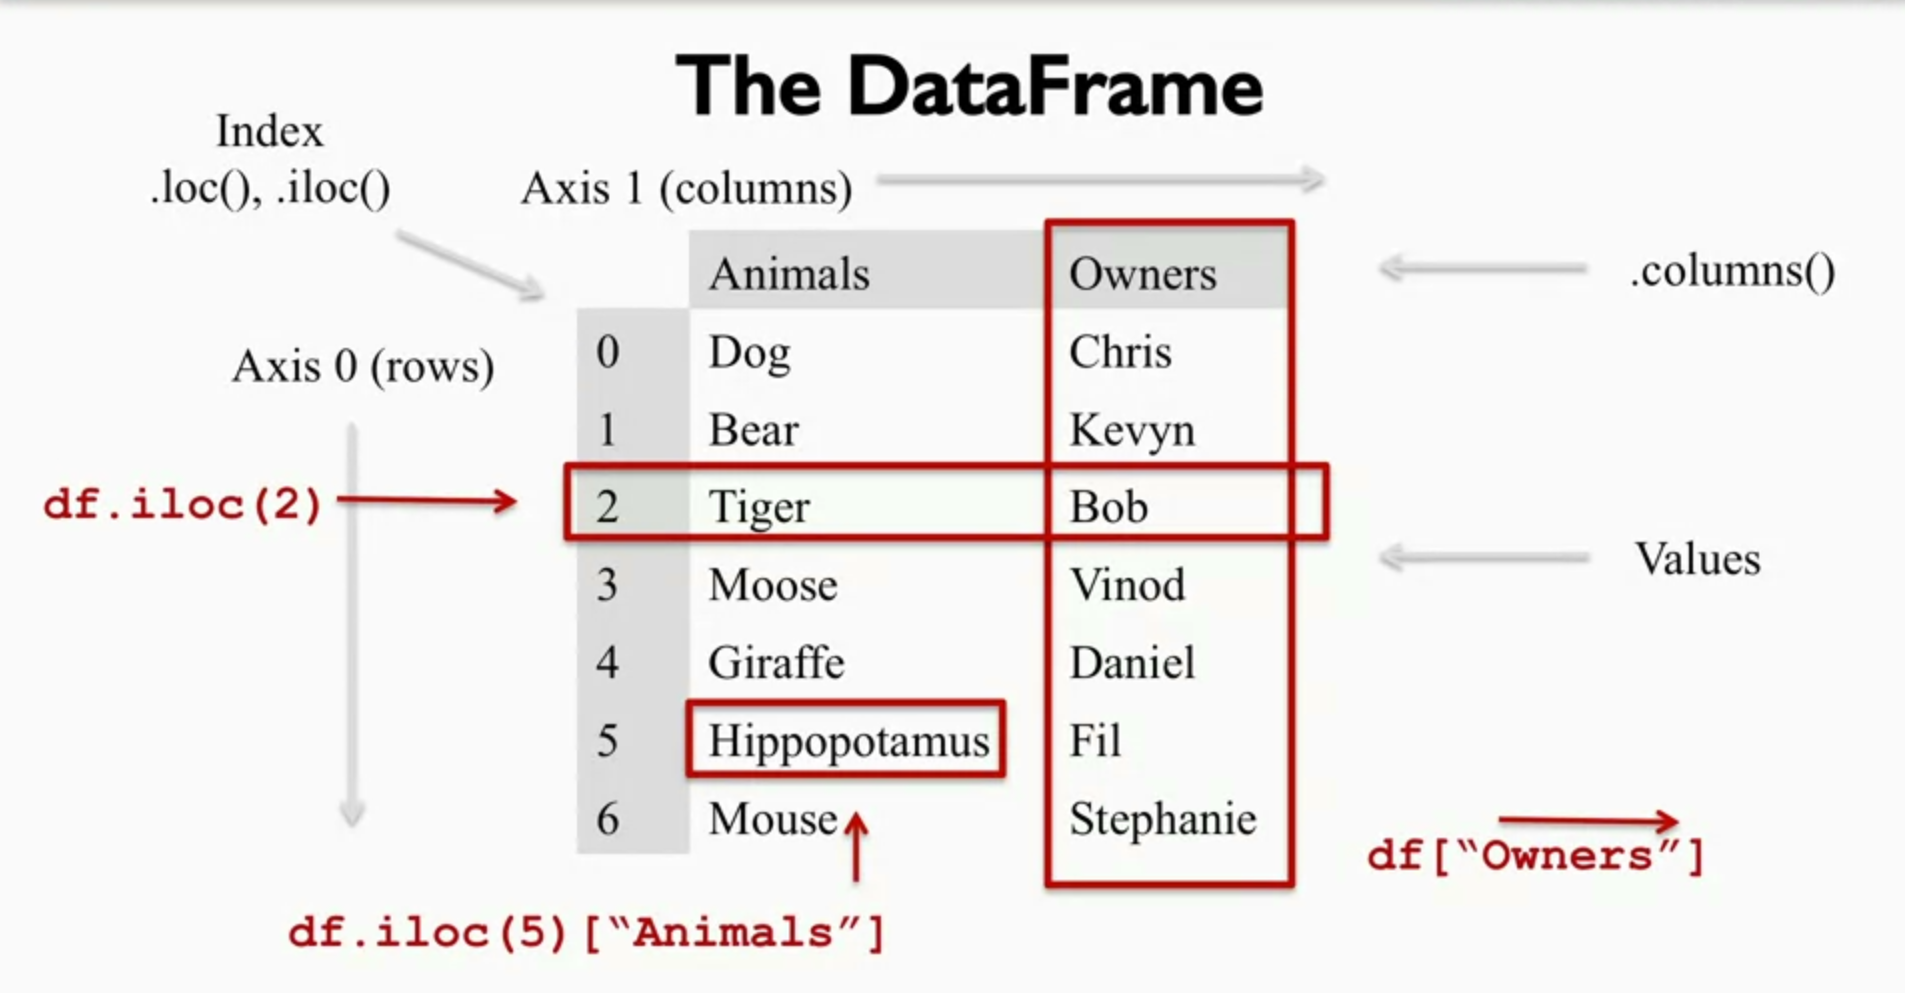

In [87]:
df.loc['Store 2']

Name                  Vinod
Item Purchased    Bird Seed
Cost                      5
Name: Store 2, dtype: object

In [88]:
type(df.loc['Store 2'])

pandas.core.series.Series

In [89]:
df.loc['Store 2'].to_frame().transpose()

,Name,Item Purchased,Cost
Store 2,Vinod,Bird Seed,5


In [90]:
df.loc['Store 1'] #it's df as 

,Name,Item Purchased,Cost
Store 1,Chris,Dog Food,22.5
Store 1,Kevyn,Kitty Litter,2.5


In [91]:
df.loc['Store 1', 'Cost']

Store 1    22.5
Store 1     2.5
Name: Cost, dtype: float64

In [92]:
df.T

,Store 1,Store 1,Store 2
Name,Chris,Kevyn,Vinod
Item Purchased,Dog Food,Kitty Litter,Bird Seed
Cost,22.5,2.5,5


In [93]:
df.T.loc['Cost']

Store 1    22.5
Store 1     2.5
Store 2       5
Name: Cost, dtype: object

In [94]:
df['Cost']

Store 1    22.5
Store 1     2.5
Store 2     5.0
Name: Cost, dtype: float64

In [95]:
df.loc['Store 1']['Cost']

Store 1    22.5
Store 1     2.5
Name: Cost, dtype: float64

important note [] this used as it view 
so better to use the full loc 

In [97]:
df.loc[:,['Name', 'Cost']]

,Name,Cost
Store 1,Chris,22.5
Store 1,Kevyn,2.5
Store 2,Vinod,5.0


In [98]:
df.drop('Store 1')

,Name,Item Purchased,Cost
Store 2,Vinod,Bird Seed,5.0


In [99]:
df

,Name,Item Purchased,Cost
Store 1,Chris,Dog Food,22.5
Store 1,Kevyn,Kitty Litter,2.5
Store 2,Vinod,Bird Seed,5.0


In [100]:
copy_df = df.copy()
copy_df = copy_df.drop('Store 1')
copy_df

,Name,Item Purchased,Cost
Store 2,Vinod,Bird Seed,5.0


In [101]:
#copy_df.drop?

In [102]:
del copy_df['Name']
copy_df

,Item Purchased,Cost
Store 2,Bird Seed,5.0


In [103]:
df['Location'] = None
df

,Name,Item Purchased,Cost,Location
Store 1,Chris,Dog Food,22.5,None
Store 1,Kevyn,Kitty Litter,2.5,None
Store 2,Vinod,Bird Seed,5.0,None


# Dataframe Indexing and Loading

In [104]:
costs = df['Cost']
costs

Store 1    22.5
Store 1     2.5
Store 2     5.0
Name: Cost, dtype: float64

In [105]:
costs+=2
costs

Store 1    24.5
Store 1     4.5
Store 2     7.0
Name: Cost, dtype: float64

In [106]:
df

,Name,Item Purchased,Cost,Location
Store 1,Chris,Dog Food,24.5,None
Store 1,Kevyn,Kitty Litter,4.5,None
Store 2,Vinod,Bird Seed,7.0,None


In [107]:
!cat olympics.csv

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
,â„– Summer,01 !,02 !,03 !,Total,â„– Winter,01 !,02 !,03 !,Total,â„– Games,01 !,02 !,03 !,Combined total
Afghanistanآ (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeriaآ (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentinaآ (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armeniaآ (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasiaآ (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
Australiaآ (AUS) [AUS] [Z],25,139,152,177,468,18,5,3,4,12,43,144,155,181,480
Austriaآ (AUT),26,18,33,35,86,22,59,78,81,218,48,77,111,116,304
Azerbaijanآ (AZE),5,6,5,15,26,5,0,0,0,0,10,6,5,15,26
Bahamasآ (BAH),15,5,2,5,12,0,0,0,0,0,15,5,2,5,12
Bahrainآ (BRN),8,0,0,1,1,0,0,0,0,0,8,0,0,1,1
Barbadosآ (BAR) [BAR],11,0,0,1,1,0,0,0,0,0,11,0,0,1,1
Belarusآ (BLR),5,12,24,39,75,6,6,4,5,15,11,18,28,44,90
Belgiumآ (BEL),25,37,52,53,142,20,1,1,3,5,45,38,53,56,147
Bermudaآ (BER),17,0,0,1,1,7,0,0,0,0,24,0,0,1,1
Bohemiaآ (BOH) [BOH] [Z],3,0,1,3,4,0,0,0,0,0,3,0,1,3,4
Botswanaآ (BOT),9,0,1,0,1,0,0,0,0,0,9

In [110]:
df = pd.read_csv('olympics.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !,02 !,03 !,Total,№ Games,01 !,02 !,03 !,Combined total
1,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12


In [116]:
df = pd.read_csv('olympics.csv', index_col = 0, skiprows=1)
df.head()

,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !.1,02 !.1,03 !.1,Total.1,№ Games,01 !.2,02 !.2,03 !.2,Combined total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [113]:
df.columns

Index(['№ Summer', '01 !', '02 !', '03 !', 'Total', '№ Winter', '01 !.1',
       '02 !.1', '03 !.1', 'Total.1', '№ Games', '01 !.2', '02 !.2', '03 !.2',
       'Combined total'],
      dtype='object')

In [125]:
for col in df.columns:
    if col[:2]=='01':
        df.rename(columns={col:'Gold' + col[4:]}, inplace=True)
    if col[:2]=='02':
        df.rename(columns={col:'Silver' + col[4:]}, inplace=True)
    if col[:2]=='03':
        df.rename(columns={col:'Bronze' + col[4:]}, inplace=True)
    if col[:1]=='№':
        df.rename(columns={col:'#' + col[1:]}, inplace=True) 

df.head()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [126]:
for col in df.columns:
    print(col[4:])

mmer

er
ze
l
nter
.1
er.1
ze.1
l.1
mes
.2
er.2
ze.2
ined total


# Querying a DataFrame

In [127]:
df['Gold'] > 0

Afghanistan (AFG)                               False
Algeria (ALG)                                    True
Argentina (ARG)                                  True
Armenia (ARM)                                    True
Australasia (ANZ) [ANZ]                          True
                                                ...  
Independent Olympic Participants (IOP) [IOP]    False
Zambia (ZAM) [ZAM]                              False
Zimbabwe (ZIM) [ZIM]                             True
Mixed team (ZZX) [ZZX]                           True
Totals                                           True
Name: Gold, Length: 147, dtype: bool

In [128]:
only_gold = df.where(df['Gold'] > 0)
only_gold.head()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Afghanistan (AFG),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria (ALG),12.0,5.0,2.0,8.0,15.0,3.0,0.0,0.0,0.0,0.0,15.0,5.0,2.0,8.0,15.0
Argentina (ARG),23.0,18.0,24.0,28.0,70.0,18.0,0.0,0.0,0.0,0.0,41.0,18.0,24.0,28.0,70.0
Armenia (ARM),5.0,1.0,2.0,9.0,12.0,6.0,0.0,0.0,0.0,0.0,11.0,1.0,2.0,9.0,12.0
Australasia (ANZ) [ANZ],2.0,3.0,4.0,5.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,4.0,5.0,12.0


In [129]:
only_gold['Gold'].count()

100

In [130]:
df['Gold'].count()

147

In [131]:
only_gold = only_gold.dropna()
only_gold.head()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Algeria (ALG),12.0,5.0,2.0,8.0,15.0,3.0,0.0,0.0,0.0,0.0,15.0,5.0,2.0,8.0,15.0
Argentina (ARG),23.0,18.0,24.0,28.0,70.0,18.0,0.0,0.0,0.0,0.0,41.0,18.0,24.0,28.0,70.0
Armenia (ARM),5.0,1.0,2.0,9.0,12.0,6.0,0.0,0.0,0.0,0.0,11.0,1.0,2.0,9.0,12.0
Australasia (ANZ) [ANZ],2.0,3.0,4.0,5.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,4.0,5.0,12.0
Australia (AUS) [AUS] [Z],25.0,139.0,152.0,177.0,468.0,18.0,5.0,3.0,4.0,12.0,43.0,144.0,155.0,181.0,480.0


In [132]:
only_gold = df[df['Gold'] > 0]
only_gold.head()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
Australia (AUS) [AUS] [Z],25,139,152,177,468,18,5,3,4,12,43,144,155,181,480


In [133]:
len(df[(df['Gold'] > 0) | (df['Gold.1'] > 0)])

101

In [134]:
df[(df['Gold.1'] > 0) & (df['Gold'] == 0)]

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Liechtenstein (LIE),16,0,0,0,0,18,2,2,5,9,34,2,2,5,9


# Indexing Dataframes

In [135]:
df.head()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [136]:
df['country'] = df.index
df = df.set_index('Gold')
df.head()

,# Summer,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total,country
Gold,,,,,,,,,,,,,,,
0,13,0,2,2,0,0,0,0,0,13,0,0,2,2,Afghanistan (AFG)
5,12,2,8,15,3,0,0,0,0,15,5,2,8,15,Algeria (ALG)
18,23,24,28,70,18,0,0,0,0,41,18,24,28,70,Argentina (ARG)
1,5,2,9,12,6,0,0,0,0,11,1,2,9,12,Armenia (ARM)
3,2,4,5,12,0,0,0,0,0,2,3,4,5,12,Australasia (ANZ) [ANZ]


In [137]:
df = df.reset_index()
df.head()

,Gold,# Summer,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total,country
0,0,13,0,2,2,0,0,0,0,0,13,0,0,2,2,Afghanistan (AFG)
1,5,12,2,8,15,3,0,0,0,0,15,5,2,8,15,Algeria (ALG)
2,18,23,24,28,70,18,0,0,0,0,41,18,24,28,70,Argentina (ARG)
3,1,5,2,9,12,6,0,0,0,0,11,1,2,9,12,Armenia (ARM)
4,3,2,4,5,12,0,0,0,0,0,2,3,4,5,12,Australasia (ANZ) [ANZ]


In [138]:
df = pd.read_csv('census.csv')
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [140]:
df['SUMLEV'].unique()

array([40, 50], dtype=int64)

In [141]:
df=df[df['SUMLEV'] == 50]
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [143]:
columns_to_keep = ['STNAME',
                   'CTYNAME',
                   'BIRTHS2010',
                   'BIRTHS2011',
                   'BIRTHS2012',
                   'BIRTHS2013',
                   'BIRTHS2014',
                   'BIRTHS2015',
                   'POPESTIMATE2010',
                   'POPESTIMATE2011',
                   'POPESTIMATE2012',
                   'POPESTIMATE2013',
                   'POPESTIMATE2014',
                   'POPESTIMATE2015']
df = df[columns_to_keep]
df.head()

,STNAME,CTYNAME,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
1,Alabama,Autauga County,151,636,615,574,623,600,54660,55253,55175,55038,55290,55347
2,Alabama,Baldwin County,517,2187,2092,2160,2186,2240,183193,186659,190396,195126,199713,203709
3,Alabama,Barbour County,70,335,300,283,260,269,27341,27226,27159,26973,26815,26489
4,Alabama,Bibb County,44,266,245,259,247,253,22861,22733,22642,22512,22549,22583
5,Alabama,Blount County,183,744,710,646,618,603,57373,57711,57776,57734,57658,57673


In [144]:
df = df.set_index(['STNAME', 'CTYNAME'])
df.head()

BIRTHS2010  BIRTHS2011  BIRTHS2012  BIRTHS2013  \
STNAME  CTYNAME                                                          
Alabama Autauga County         151         636         615         574   
        Baldwin County         517        2187        2092        2160   
        Barbour County          70         335         300         283   
        Bibb County             44         266         245         259   
        Blount County          183         744         710         646   

                        BIRTHS2014  BIRTHS2015  POPESTIMATE2010  \
STNAME  CTYNAME                                                   
Alabama Autauga County         623         600            54660   
        Baldwin County        2186        2240           183193   
        Barbour County         260         269            27341   
        Bibb County            247         253            22861   
        Blount County          618         603            57373   

                        POPESTIMATE2011  POPESTIMATE2012  POPESTIMATE2013  \
STNAME  CTYNAME                                                             
Alabama Autauga County            55253            55175            55038   
        Baldwin County           186659           190396           195126   
        Barbour County            27226            27159            26973   
        Bibb County               22733            22642            22512   
        Blount County             57711            57776            57734   

                        POPESTIMATE2014  POPESTIMATE2015  
STNAME  CTYNAME                                           
Alabama Autauga County            55290            55347  
        Baldwin County           199713           203709  
        Barbour County            26815            26489  
        Bibb County               22549            22583  
        Blount County             57658            57673

In [146]:
#the order must be as the index
df.loc['Michigan', 'Washtenaw County']

BIRTHS2010            977
BIRTHS2011           3826
BIRTHS2012           3780
BIRTHS2013           3662
BIRTHS2014           3683
BIRTHS2015           3709
POPESTIMATE2010    345563
POPESTIMATE2011    349048
POPESTIMATE2012    351213
POPESTIMATE2013    354289
POPESTIMATE2014    357029
POPESTIMATE2015    358880
Name: (Michigan, Washtenaw County), dtype: int64

In [147]:
df.loc[ [('Michigan', 'Washtenaw County'),
         ('Michigan', 'Wayne County')] ]

BIRTHS2010  BIRTHS2011  BIRTHS2012  BIRTHS2013  \
STNAME   CTYNAME                                                            
Michigan Washtenaw County         977        3826        3780        3662   
         Wayne County            5918       23819       23270       23377   

                           BIRTHS2014  BIRTHS2015  POPESTIMATE2010  \
STNAME   CTYNAME                                                     
Michigan Washtenaw County        3683        3709           345563   
         Wayne County           23607       23586          1815199   

                           POPESTIMATE2011  POPESTIMATE2012  POPESTIMATE2013  \
STNAME   CTYNAME                                                               
Michigan Washtenaw County           349048           351213           354289   
         Wayne County              1801273          1792514          1775713   

                           POPESTIMATE2014  POPESTIMATE2015  
STNAME   CTYNAME                                             
Michigan Washtenaw County           357029           358880  
         Wayne County              1766008          1759335

# Missing values

In [148]:
df = pd.read_csv('log.csv')
df

,time,user,video,playback position,paused,volume
0,1469974424,cheryl,intro.html,5,False,10.0
1,1469974454,cheryl,intro.html,6,NaN,NaN
2,1469974544,cheryl,intro.html,9,NaN,NaN
3,1469974574,cheryl,intro.html,10,NaN,NaN
4,1469977514,bob,intro.html,1,NaN,NaN
5,1469977544,bob,intro.html,1,NaN,NaN
6,1469977574,bob,intro.html,1,NaN,NaN
7,1469977604,bob,intro.html,1,NaN,NaN
8,1469974604,cheryl,intro.html,11,NaN,NaN
9,1469974694,cheryl,intro.html,14,NaN,NaN


In [149]:
#df.fillna?

In [151]:
df = df.set_index('time')
df = df.sort_index()
df

KeyError: "None of ['time'] are in the columns"

In [152]:
df = df.reset_index()
df = df.set_index(['time', 'user'])
df

video  playback position paused  volume
time       user                                                   
1469974424 cheryl     intro.html                  5  False    10.0
           sue     advanced.html                 23  False    10.0
1469974454 cheryl     intro.html                  6    NaN     NaN
           sue     advanced.html                 24    NaN     NaN
1469974484 cheryl     intro.html                  7    NaN     NaN
1469974514 cheryl     intro.html                  8    NaN     NaN
1469974524 sue     advanced.html                 25    NaN     NaN
1469974544 cheryl     intro.html                  9    NaN     NaN
1469974554 sue     advanced.html                 26    NaN     NaN
1469974574 cheryl     intro.html                 10    NaN     NaN
1469974604 cheryl     intro.html                 11    NaN     NaN
1469974624 sue     advanced.html                 27    NaN     NaN
1469974634 cheryl     intro.html                 12    NaN     NaN
1469974654 sue     advanced.html                 28    NaN     5.0
1469974664 cheryl     intro.html                 13    NaN     NaN
1469974694 cheryl     intro.html                 14    NaN     NaN
1469974724 cheryl     intro.html                 15    NaN     NaN
           sue     advanced.html                 29    NaN     NaN
1469974754 sue     advanced.html                 30    NaN     NaN
1469974824 sue     advanced.html                 31    NaN     NaN
1469974854 sue     advanced.html                 32    NaN     NaN
1469974924 sue     advanced.html                 33    NaN     NaN
1469977424 bob        intro.html                  1   True    10.0
1469977454 bob        intro.html                  1    NaN     NaN
1469977484 bob        intro.html                  1    NaN     NaN
1469977514 bob        intro.html                  1    NaN     NaN
1469977544 bob        intro.html                  1    NaN     NaN
1469977574 bob        intro.html                  1    NaN     NaN
1469977604 bob        intro.html                  1    NaN     NaN
1469977634 bob        intro.html                  1    NaN     NaN
1469977664 bob        intro.html                  1    NaN     NaN
1469977694 bob        intro.html                  1    NaN     NaN
1469977724 bob        intro.html                  1    NaN     NaN

In [153]:
df = df.fillna(method='ffill')
df.head()

video  playback position  paused  volume
time       user                                                    
1469974424 cheryl     intro.html                  5   False    10.0
           sue     advanced.html                 23   False    10.0
1469974454 cheryl     intro.html                  6   False    10.0
           sue     advanced.html                 24   False    10.0
1469974484 cheryl     intro.html                  7   False    10.0